# Human monitoring activity

In [17]:
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


import tensorflow as tf
from tensorflow  import keras as k
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

# # Read data & add to X, y

In [18]:
def load_files(filepath):
    dataset = pd.DataFrame()
    #y = 
    for i in range(1, 15):
        filename1 = filepath + str(i) + '.csv'
        # I need class as a column to be able to do a pairplot
        dataset_trainX = pd.read_csv(filename1, usecols=[1,2,3,4], names=['ax', 'ay', 'az', 'class'], header=None)
        dataset = dataset.append(dataset_trainX, ignore_index = True)
        #position_class

    return dataset

In [19]:
filepath = 'activityRecognition/'
dataset = load_files(filepath)

In [20]:
#dataset["class"].plot()
dataset.describe()

,ax,ay,az,class
count,1.823395e+06,1.823395e+06,1.823395e+06,1.823395e+06
mean,1.982025e+03,2.374125e+03,1.968226e+03,3.938922e+00
std,1.112281e+02,9.555790e+01,9.515460e+01,2.441348e+00
min,2.820000e+02,2.000000e+00,1.000000e+00,0.000000e+00
25%,1.900000e+03,2.334000e+03,1.915000e+03,1.000000e+00
50%,1.981000e+03,2.362000e+03,1.985000e+03,4.000000e+00
75%,2.070000e+03,2.395000e+03,2.031000e+03,7.000000e+00
max,3.828000e+03,4.095000e+03,4.095000e+03,7.000000e+00


In [21]:
dataset = dataset[dataset['class'] != 0] # tar bort alla med klass 0

In [22]:
# test data model function 
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [23]:
#dataset["class"].plot() # kolla så allt stämmer dvs klasserna ligger mellan 1-7

In [24]:
#dataset.drop('class', inplace=False, axis=1).plot()

# Remove outliners

In [25]:
# reomve ouliners # ta bort alla extrema värden!

#ay
max_thresold = dataset["ay"].quantile(0.99997) #0.999985  lägre mindre distru

min_thresold = dataset["ay"].quantile(0.000015)  # högre mindre dis -1->5---jag har nu lag högre

#az
az_max_thresold = dataset["az"].quantile(0.999982) #0.999985  lägre mindre dis

az_min_thresold = dataset["az"].quantile(0.00004)  # högre mindre distru -1->5---jag har nu lag högre

ax_min_thresold = dataset["ax"].quantile(0.00002)  # högre mindre distru -1->5---jag har nu lag högre
#X = X[(X["ay"]<max_thresold) & (X["ay"]>min_thresold)]
#X.plot()

dataset_noEx = pd.DataFrame()

dataset_noEx = dataset[(dataset["ay"]<max_thresold) & (dataset["ay"]>min_thresold) & (dataset["az"]<az_max_thresold) & (dataset["az"]>az_min_thresold)  & (dataset["ax"]>ax_min_thresold)]

dataset_noEx.head()
dataset_noEx.describe()

,ax,ay,az,class
count,1.819520e+06,1.819520e+06,1.819520e+06,1.819520e+06
mean,1.981830e+03,2.373882e+03,1.968129e+03,3.947217e+00
std,1.108444e+02,9.465487e+01,9.438587e+01,2.437288e+00
min,1.115000e+03,1.042000e+03,1.154000e+03,1.000000e+00
25%,1.900000e+03,2.334000e+03,1.915000e+03,1.000000e+00
50%,1.980000e+03,2.362000e+03,1.985000e+03,4.000000e+00
75%,2.070000e+03,2.394000e+03,2.031000e+03,7.000000e+00
max,3.154000e+03,3.120000e+03,3.124000e+03,7.000000e+00


In [26]:
#sns_plot = sns.pairplot(dataset_noEx, hue="class", palette="coolwarm")

# BALANCE DATA

In [27]:
dataset_noEx["class"].value_counts()

7    576063
1    556915
4    339553
3    208827
5     48196
6     46770
2     43196
Name: class, dtype: int64

In [28]:
one = dataset_noEx[dataset['class'] == 1].head(43198).copy()
two = dataset_noEx[dataset['class'] == 2].head(43198).copy()
three = dataset_noEx[dataset["class"]==3].head(43198).copy()
four = dataset_noEx[dataset["class"]==4].head(43198).copy()
five = dataset_noEx[dataset["class"]==5].head(43198).copy()
six = dataset_noEx[dataset["class"]==6].head(43198).copy()
seven = dataset_noEx[dataset["class"]==7].head(43198).copy()


balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([one, two, three, four, five, six, seven])
balanced_data.shape


C:\Users\amina\anaconda3\envs\env-tf\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\amina\anaconda3\envs\env-tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\amina\anaconda3\envs\env-tf\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\amina\anaconda3\envs\env-tf\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\amina\anaconda3\envs\env-tf\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\amina\anaconda3\envs\env-tf\li

(302384, 4)

In [29]:
balanced_data["class"].value_counts()

1    43198
3    43198
4    43198
5    43198
6    43198
7    43198
2    43196
Name: class, dtype: int64

In [30]:
balanced_data.head()

,ax,ay,az,class
0,1502,2215,2153,1
1,1667,2072,2047,1
2,1611,1957,1906,1
3,1601,1939,1831,1
4,1643,1965,1879,1


# Split data

In [31]:
#split data to x y.
X = balanced_data.drop('class', inplace=False, axis=1)
y = balanced_data.drop(['ax', 'ay', 'az'], inplace=False, axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standard scalar

In [32]:
from sklearn.preprocessing import StandardScaler
# standard scale  ???? ska man???
sc=StandardScaler()
train_x=sc.fit_transform(X_train)
test_x=sc.fit_transform(X_test)

# KNN

In [33]:
Y = y_train["class"]
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=65) 
classifier.fit(train_x, y_train)

C:\Users\amina\anaconda3\envs\env-tf\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=65)

In [34]:
y_pred = classifier.predict(test_x)
from sklearn.metrics import classification_report, confusion_matrix

#print(classification_report(y_test, y_pred))
"""
print(confusion_matrix(y_test, y_pred))
MSE = np.square(np.subtract(y_test["class"], y_pred)).mean()
import math
RMSE = math.sqrt(MSE)
print(RMSE)

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print(RMSE)
#accuracy_score(actual, predicted)
"""

'\nprint(confusion_matrix(y_test, y_pred))\nMSE = np.square(np.subtract(y_test["class"], y_pred)).mean()\nimport math\nRMSE = math.sqrt(MSE)\nprint(RMSE)\n\nfrom sklearn.metrics import mean_squared_error\nMSE = mean_squared_error(y_test, y_pred)\nRMSE = math.sqrt(MSE)\nprint(RMSE)\n#accuracy_score(actual, predicted)\n'

In [35]:
"""X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.preprocessing import StandardScaler
best = 0 #testing the best nr for k
lastAcc = 0
listAcc = []
for x in range(1,10):
    # standard scale  ???? ska man???
    sc=StandardScaler()
    train_x=sc.fit_transform(X_train)
    test_x=sc.fit_transform(X_test)

    Y = y_train["class"]
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=x) # testa dig fram till bästa resulat- skapa en for loop som kollar
    classifier.fit(X_train, Y)

    acc = get_score(classifier, X_train, X_test, y_train, y_test)
    if acc > lastAcc:
        best = x
        lastAcc = acc
    keeper ="K: ", x, "Acc: ", acc
    listAcc.append(keeper)
    
    #accuracy_score(actual, predicted)
listAcc
best
"""

'X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)\nfrom sklearn.preprocessing import StandardScaler\nbest = 0 #testing the best nr for k\nlastAcc = 0\nlistAcc = []\nfor x in range(1,10):\n    # standard scale  ???? ska man???\n    sc=StandardScaler()\n    train_x=sc.fit_transform(X_train)\n    test_x=sc.fit_transform(X_test)\n\n    Y = y_train["class"]\n    from sklearn.neighbors import KNeighborsClassifier\n    classifier = KNeighborsClassifier(n_neighbors=x) # testa dig fram till bästa resulat- skapa en for loop som kollar\n    classifier.fit(X_train, Y)\n\n    acc = get_score(classifier, X_train, X_test, y_train, y_test)\n    if acc > lastAcc:\n        best = x\n        lastAcc = acc\n    keeper ="K: ", x, "Acc: ", acc\n    listAcc.append(keeper)\n    \n    #accuracy_score(actual, predicted)\nlistAcc\nbest\n'

# Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_pred)

array([[8372,   59,   59,  114,   72,   12,   32],
       [  73, 6498,  246,  603,  630,  234,  279],
       [ 120,  261, 5529,  853,  416,  524, 1056],
       [ 146,  221,  557, 6680,  496,  308,  217],
       [ 143,  578,  746, 1316, 5013,  708,  151],
       [  19,  327,  423,  717, 1246, 5651,   92],
       [  25,  177,  291,  307,   47,   13, 7820]], dtype=int64)

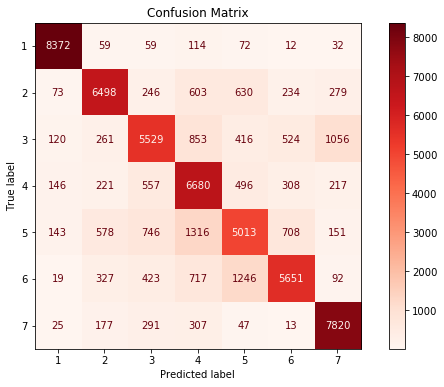

In [37]:
matrix = plot_confusion_matrix(classifier, test_x, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.gcf().set_size_inches(10, 6)

In [38]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = ["1", "2", "3", "4", "5", "6", "7"]
cm = confusion_matrix(y_test, y_pred)
#print(cm, "CM")
#print(pd.Dataframe(cm))
# Accuracy
from sklearn.metrics import accuracy_score
#print(accuracy_score(y_test, y_pred) , "AC")
# Recall
from sklearn.metrics import recall_score
#print(recall_score(y_test, y_pred, average=None), "RE")
# Precision
from sklearn.metrics import precision_score
#print(precision_score(y_test, y_pred, average=None) , "PR")

# info 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95      8720
           2       0.80      0.76      0.78      8563
           3       0.70      0.63      0.67      8759
           4       0.63      0.77      0.70      8625
           5       0.63      0.58      0.60      8655
           6       0.76      0.67      0.71      8475
           7       0.81      0.90      0.85      8680

    accuracy                           0.75     60477
   macro avg       0.75      0.75      0.75     60477
weighted avg       0.75      0.75      0.75     60477



# Neural network

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
#test_x train_x  y_train, y_test 